# Executive Summary

## About the Data
Data source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## In this notebook:
0. Data Understanding
1. Data Pre-processing
2. Data Modelling
3. Model Evaluation
4. Metric Evaluation
5. Model Conclusion

In [ ]:
#@title Library Import

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#@title Load Dataset
#link:https://drive.google.com/file/d/1empaWFjl706Y2BbYzxMpAQLmIBZiPQC3/view?usp=sharing

# ID File
file_id = '1empaWFjl706Y2BbYzxMpAQLmIBZiPQC3'

# URL untuk mengakses file secara langsung dari Google Drive
url = f'https://drive.google.com/uc?id={file_id}'

# Baca dataset
df = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


##0. Data Understanding

###Elaborasi features dan tipe data (nominal, ordinal, numerical)

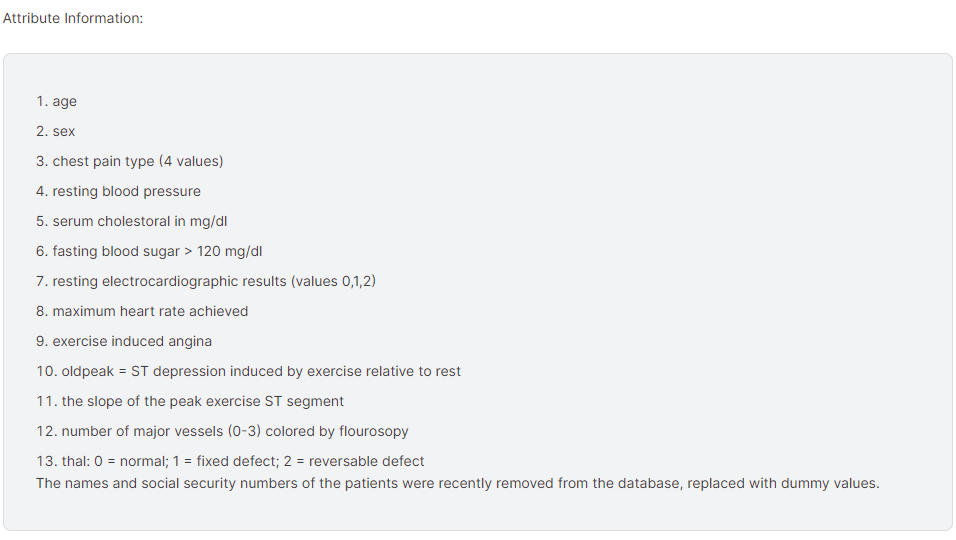

Dari informasi di atas, diketahui bahwa pada dataset terdapat 13 features dan 1 label/kelas.


*   age -->
Feature ini berisikan umur dari pasien, tipe datanya ialah float64 (numerical)
*   sex -->
Feature ini memberikan info mengenai jenis kelamin dari pasien. Tipe datanya sebenarnya ialah nominal (Male dan Female) akan tetapi dilakukan encoding menjadi terhadap data. Kini tipe data feature sex ialah int64(numerical), yang mana 1 = male dan  0 = female
*   cp --> cp merupakan Chest Pain Type (4 values). Ini menunjukkan jenis nyeri dada yang dirasakan oleh pasien, yang memiliki 4 nilai kategori yang mungkin. Tetapi sudah dilakukan encoding terhadap data, hingga kini dataset bertipe int64.
*   trestbps --> resting blood pressure (in mm Hg on admission to the hospital). Feature ini menunjukkan tekanan darah istirahat pasien, yang diukur dalam mmHg (milimeter air raksa). Feature ini bertipe data numerik, tepatnya int64.
* chol --> serum cholestoral in mg/dl. Ini adalah kadar kolesterol serum pasien dalam mg/dl (miligram per desiliter). Feature ini bertipe data numerikal.
* fbs --> (fasting blood sugar>120 mg/dl) (1 = true; 0 = false). Ini menunjukkan kadar gula darah puasa pasien. Tipe datanya ialah categorical dengan nilai 1 jika gula darah puasa >120 mg/dl dan nilai 0 jika tidak. Pada dataset, feature ini sudah di encoding dengan label 1 bernilai true dan 0 bernilai false (nominal).
* restecg --> resting electrocardiographic results. Ini adalah hasil elektrokardiogram istirahat pasien,  dengan nilai 0,1, dan 2. Feature ini bertipe data ordinal (categorical).
* thalach --> maximum heart rate achieved. Ini adalah detak jantung maksimum yang dicapai oleh pasien selama tes. Feature ini bertipe data numerik.
* exang --> exercise induced angina (1 = yes; 0 = no). Ini menunjukkan apakah pasien mengalami angina yang diinduksi oleh latihan, dengan angka 1 bernilai true, angka 0 bernilai false. Feature bertipe data nominal.
* oldpeak --> ST depression induced by exercise relative to rest. Ini adalah depresi ST yang diinduksi oleh latihan relatif terhadap istirahat. Feature ini bertipe numerik.
*  slope --> the slope of the peak exercise ST segment. Ini adalah kemiringan segmen ST latihan puncak. Feature ini bernilai 0, 1, dan 2 (ordinal).
* ca --> number of major vessels (0-3) colored by flourosopy. Ini adalah jumlah pembuluh darah besar yang berwarna oleh flourosopi. Feature ini memiliki nilai 0, 1, 2, dan 3 (ordinal).
* thal --> 1 = normal; 2 = fixed defect; 3 = reversable defect. Ini adalah jenis defect thalassemia, dengan nilai 1 untuk normal, 2 untuk fixed defect dan 3 untuk reversable defect (nominal)
* target --> 1 or 0. Ini merupakan label atau target variabel yang menunjukkan kemungkinan individu mengidap penyakit jantung, 1 menunjukkan true dan 0 bernilai false.








In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


feature yang bertipe numerik (bukan hasil encoding) adalah: trestbps, chol, thalach

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##1. Data Preprocessing

###Cek Missing Values

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

tidak ada missing values

###Cek Duplicated Data

In [ ]:
df.duplicated().sum()

723

handling duplikat data dengan dropping values

In [ ]:
df.drop_duplicates(inplace=True)

###Cek Outlier Data

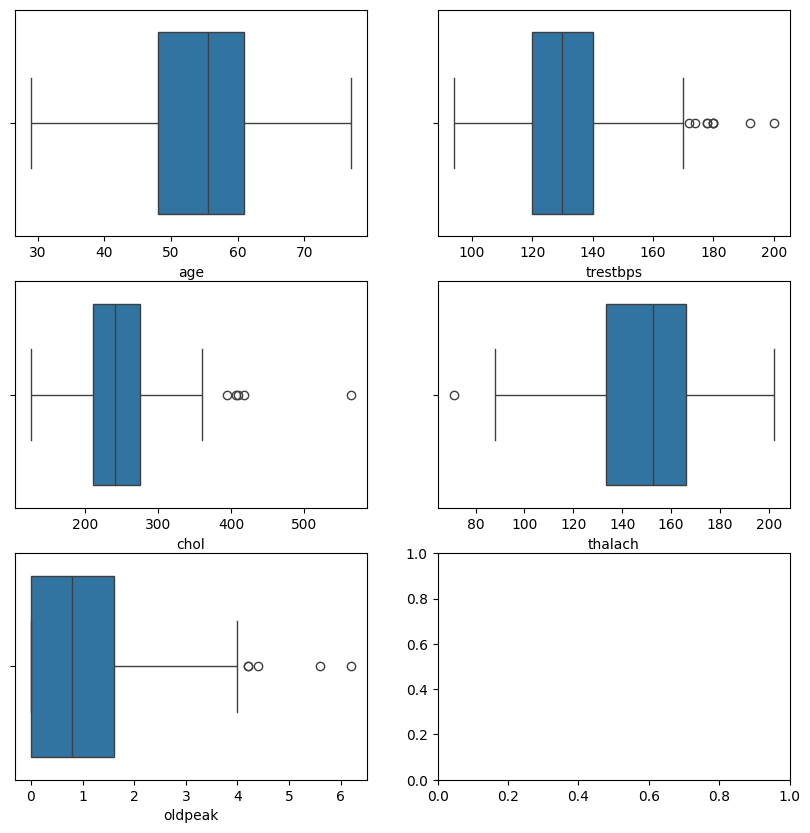

In [ ]:
#dilakukan pengecekan outliers pada data numerik
fig, ax = plt.subplots(3,2, figsize=(10,10))
data = df['age'], df['trestbps'], df['chol'], df['thalach'], df['oldpeak']
for col, ax in zip(data, ax.flatten()):
  sns.boxplot(data=df, x=col, ax=ax)

In [ ]:
#@title handling outlier

for col in ['age','trestbps', 'chol', 'thalach', 'oldpeak']:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  for i in range(len(df[col])):
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

###Cek Imbalance Data

In [ ]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

data terbilang balance

###Normalisasi
normalisasi dilakukan dengan MinMaxScaler agar nilai berada dalam rentang 0-1. ini dilakukan pada tipe data numerik

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
  df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.407895,0.351918,0,1,0.711559,0,0.250,2,2,3,0
1,0.500000,1,0,0.605263,0.315090,1,0,0.601273,1,0.775,0,0,3,0
2,0.854167,1,0,0.671053,0.196419,0,1,0.346766,1,0.650,0,0,3,0
3,0.666667,1,0,0.710526,0.315090,0,1,0.652174,0,0.000,2,1,3,0
4,0.687500,0,0,0.578947,0.687468,1,1,0.185578,0,0.475,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0.812500,0,2,0.342105,0.347826,0,0,0.261930,0,0.375,1,0,2,1
733,0.312500,0,2,0.184211,0.061381,0,1,0.770944,0,0.150,1,0,2,1
739,0.479167,1,0,0.447368,0.527877,0,1,0.652174,1,0.000,2,1,3,0
843,0.625000,1,3,0.868421,0.601535,0,0,0.346766,0,0.000,2,0,2,0


##2. Data Modelling
Pemodelan dilakukan dengan algoritma supervised karena tujuan pemodelan ialah untuk klasifikasi. Terdapat beberapa algoritma yang digunakan:


*   K-Nearest Neighbors
*   Decision Tree
* SVM
* Random Forest

Dari percobaan ke-4 algoritma di atas, nantinya akan dipilih satu algoritma. Selain itu, dilakukan juga pemodelan dengan feature selection dan pemodelan dengan semua feature



###Feature Selection

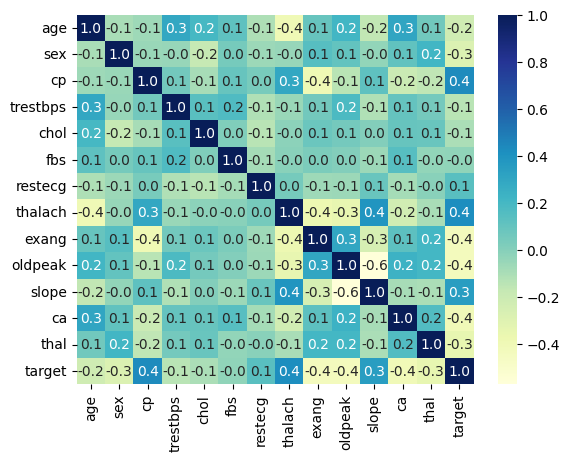

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".1f")

# displaying heatmap
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
# dipilih feature dengan korelasi featurenya besar sama dengan 0.3
feature_cols = ['sex','cp', 'exang','slope', 'ca', 'thal']

###K-Nearest Neighbors

#### dengan feature selection

In [ ]:
X = df[feature_cols]
y = df['target']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Mencari tingkat Error dimana k = 1 hingga 40
error = []
for i in range(1, 40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

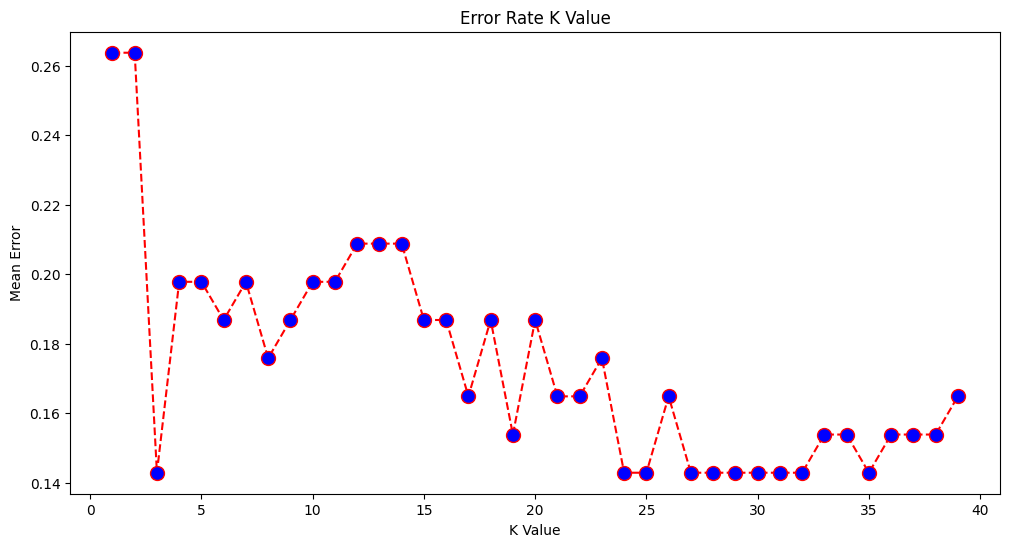

In [ ]:
# Membuat plot Error Rate K Value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
 markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
# Digunakan K = 25
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
# Membuat matrix konfusi
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[28  8]
 [ 5 50]]


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
# Menghitung nilai akurasi dari klasifikasi KNN
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           1       0.86      0.91      0.88        55

    accuracy                           0.86        91
   macro avg       0.86      0.84      0.85        91
weighted avg       0.86      0.86      0.86        91

Accuracy: 0.8571428571428571


####Semua feature

In [ ]:
X = df.drop(columns = 'target')
y = df['target']

In [ ]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Mencari tingkat Error dimana k = 1 hingga 40
error = []
for i in range(1, 40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

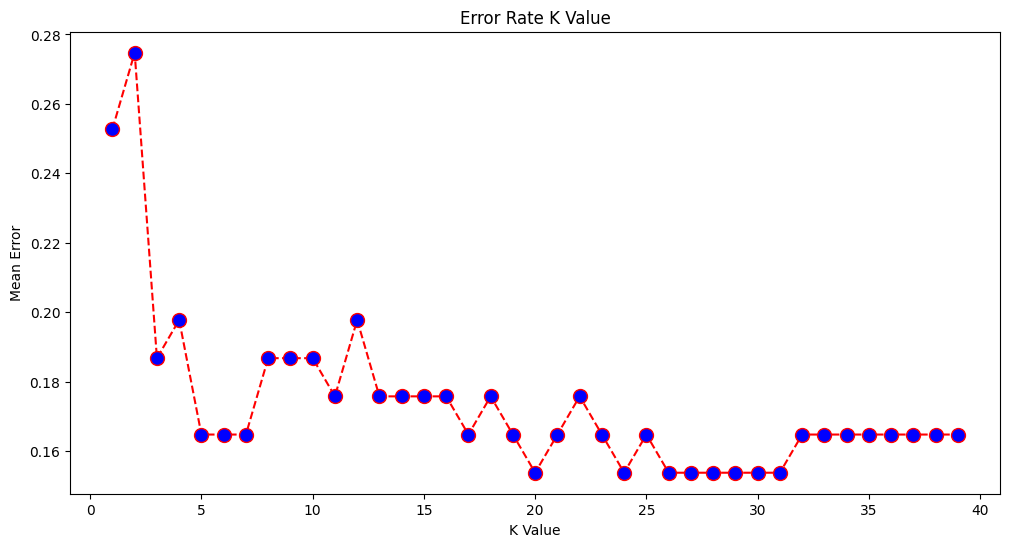

In [ ]:
# Membuat plot Error Rate K Value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
 markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
# Digunakan K = 27
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=27)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [ ]:
# Membuat matrix konfusi
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[28  8]
 [ 6 49]]


In [ ]:
# Menghitung nilai akurasi dari klasifikasi KNN
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.86      0.89      0.88        55

    accuracy                           0.85        91
   macro avg       0.84      0.83      0.84        91
weighted avg       0.85      0.85      0.85        91

Accuracy: 0.8461538461538461


###Decision Tree

#### dengan feature selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = df[feature_cols]
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#@title confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[30  6]
 [14 41]]


In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        36
           1       0.87      0.75      0.80        55

    accuracy                           0.78        91
   macro avg       0.78      0.79      0.78        91
weighted avg       0.80      0.78      0.78        91

Accuracy 0.7802197802197802


####semua feature

In [ ]:
X = df.drop(columns='target')
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#@title confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[28  8]
 [14 41]]


In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        36
           1       0.84      0.75      0.79        55

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.77      0.76      0.76        91

Accuracy 0.7582417582417582


###SVM

#### dengan feature selection

In [ ]:
X = df[feature_cols]
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#@title confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[31  5]
 [14 41]]


In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        36
           1       0.89      0.75      0.81        55

    accuracy                           0.79        91
   macro avg       0.79      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91

Accuracy 0.7912087912087912


####semua feature

In [ ]:
X = df.drop(columns='target')
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#@title confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[30  6]
 [ 7 48]]


In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        36
           1       0.89      0.87      0.88        55

    accuracy                           0.86        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

Accuracy 0.8571428571428571


###Random Forest

#### dengan feature selection

In [ ]:
X = df[feature_cols]
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#@title confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[31  5]
 [13 42]]


In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.78        36
           1       0.89      0.76      0.82        55

    accuracy                           0.80        91
   macro avg       0.80      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91

Accuracy 0.8021978021978022


####semua feature

In [ ]:
X = df.drop(columns='target')
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#@title confusion matrix
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[32  4]
 [ 8 47]]


In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        36
           1       0.92      0.85      0.89        55

    accuracy                           0.87        91
   macro avg       0.86      0.87      0.86        91
weighted avg       0.87      0.87      0.87        91

Accuracy 0.8681318681318682


###Conclusion

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

pipeline = Pipeline([
    ('clf', KNeighborsClassifier())
])

param_grid = [{
    'clf' : [KNeighborsClassifier()]
},
{
    'clf' : [DecisionTreeClassifier()]
},
{
    'clf' : [svm.SVC()]
},
{
    'clf' : [RandomForestClassifier()]
}]

model_tuning = GridSearchCV(
    pipeline,
    param_grid = param_grid,
    cv = 3
)

model_tuning.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', KNeighborsClassifier())]),
             param_grid=[{'clf': [KNeighborsClassifier()]},
                         {'clf': [DecisionTreeClassifier()]}, {'clf': [SVC()]},
                         {'clf': [RandomForestClassifier()]}])

In [ ]:
model_tuning.best_params_

{'clf': SVC()}

Dari beberapa percobaan model yang telah dilakukan, disimpulkan model yang lebih baik adalah SVM dengan semua feature

##3. Improving Model

- Cross Validation
- Learning Curves
- Hyperparameter Tuning
- Boostrapping

###Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

clf =svm.SVC()

cv_score = cross_val_score(clf, X, y, cv = 10)
print('Cross Validation Score')
print(cv_score)

#predict using cross val
y_pred = cross_val_predict(clf, X, y, cv = 10)


Cross Validation Score
[0.87096774 0.83870968 0.8        0.86666667 0.96666667 0.96666667
 0.8        0.8        0.76666667 0.86666667]


Dilakukan cross validation dengan model SVM classifier (SVC).
Fungsi 'cross_val_score' akan melatih model dengan nilai cv = 10. Skor yang dihasilkan disimpan dalam variabel 'cv_score'.



###Learning Curves

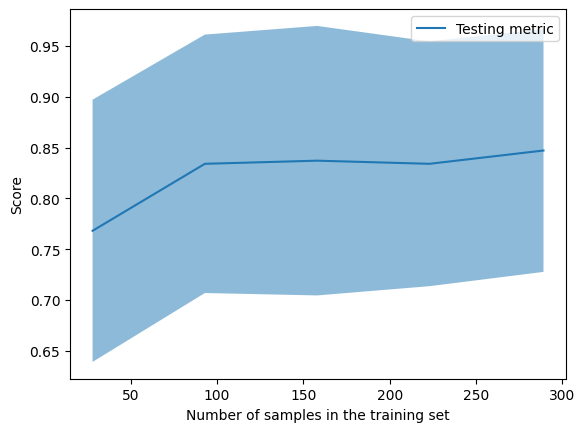

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, learning_curve

clf =svm.SVC()

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv = 25)
display = LearningCurveDisplay(train_sizes=train_sizes,
                               train_scores = train_scores, test_scores = test_scores, score_name='Score')
display.plot()
plt.show()

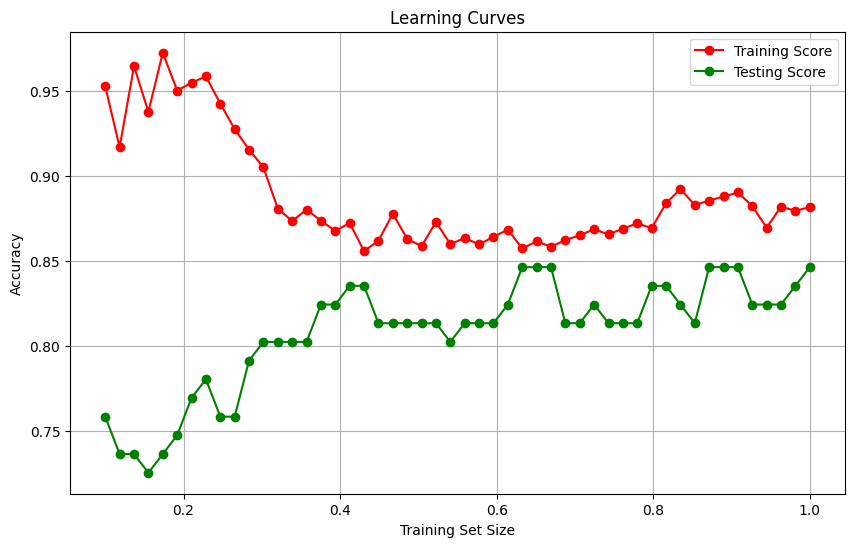

In [ ]:
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test =[]

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

clf =svm.SVC()

for train_size in train_sizes:
  num_samples = int(train_size * len(X_train))
  X_subset = X_train[:num_samples]
  y_subset = y_train[:num_samples]

  clf.fit(X_subset, y_subset)

  y_pred_train = clf.predict(X_subset)
  acc_train = accuracy_score(y_subset, y_pred_train)
  learning_curve_train.append(acc_train)

  y_pred_test = clf.predict(X_test)
  acc_test = accuracy_score(y_test, y_pred_test)
  learning_curve_test.append(acc_test)

# plot learning curve
plt.figure(figsize=(10,6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel(('Accuracy'))
plt.grid()
plt.plot(train_sizes, learning_curve_train,'o-', color='r', label='Training Score')
plt.plot(train_sizes, learning_curve_test,'o-', color='g', label='Testing Score')
plt.legend(loc='best')
plt.show()

Learning curves menunjukkan bahwa progress belajar underfit

###Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=100, random_state=42)
model_tuning = GridSearchCV(
    svm.SVC(),
    param_grid= param_grid,
    refit = True,
    verbose = 3,
    cv=cv
)

model_tuning.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV 1/1000] END ....C=1000, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 2/1000] END ....C=1000, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/1000] END ....C=1000, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/1000] END ....C=1000, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 5/1000] END ....C=1000, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 6/1000] END ....C=1000, gamma=1, kernel=rbf;, score=0.905 total time=   0.0s
[CV 7/1000] END ....C=1000, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 8/1000] END ....C=1000, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 9/1000] END ....C=1000, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 10/1000] END ...C=1000, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 11/1000] END ...C=1000, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 12/1000] END ...C=1000, gamma=1, kernel=rbf;, score=0.

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=100, n_splits=10, random_state=42),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
pd.DataFrame(model_tuning.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split993_test_score,split994_test_score,split995_test_score,split996_test_score,split997_test_score,split998_test_score,split999_test_score,mean_test_score,std_test_score,rank_test_score
6,0.005758,0.001344,0.002990,0.000914,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.727273,0.952381,...,0.809524,0.904762,0.857143,0.714286,0.809524,0.809524,0.952381,0.843695,0.075875,1
5,0.006792,0.001504,0.003146,0.000942,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.772727,0.904762,...,0.809524,0.857143,0.857143,0.809524,0.761905,0.809524,0.904762,0.839078,0.079897,2
12,0.005554,0.001262,0.002866,0.000847,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.772727,0.952381,...,0.761905,0.857143,0.809524,0.761905,0.809524,0.857143,0.952381,0.836439,0.074585,3
18,0.005286,0.000931,0.002697,0.000678,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.772727,0.904762,...,0.666667,0.857143,0.809524,0.761905,0.809524,0.857143,0.952381,0.831961,0.075854,4
24,0.005626,0.001252,0.002913,0.000964,1000,0.0001,rbf,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.772727,0.904762,...,0.666667,0.857143,0.809524,0.761905,0.809524,0.857143,0.952381,0.831677,0.075634,5
23,0.006129,0.001363,0.002932,0.000890,1000,0.001,rbf,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",0.772727,0.809524,...,0.761905,0.857143,0.857143,0.761905,0.714286,0.904762,0.952381,0.831004,0.075764,6
11,0.006170,0.001441,0.003199,0.001163,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.727273,0.857143,...,0.809524,0.904762,0.761905,0.666667,0.666667,0.857143,1.000000,0.830703,0.077780,7
17,0.006157,0.001472,0.002980,0.000917,100,0.01,rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.772727,0.857143,...,0.761905,0.904762,0.857143,0.714286,0.761905,0.904762,0.952381,0.827056,0.079006,8
22,0.009655,0.002415,0.003110,0.000950,1000,0.01,rbf,"{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}",0.772727,0.857143,...,0.809524,0.904762,0.761905,0.761905,0.666667,0.904762,0.857143,0.819558,0.079962,9
1,0.005926,0.001512,0.002886,0.000888,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.772727,0.904762,...,0.714286,0.857143,0.809524,0.809524,0.809524,0.714286,0.904762,0.816671,0.077760,10


In [ ]:
model_tuning.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
model_tuning.score(X_test, y_test)

0.8351648351648352

In [ ]:
y_pred = model_tuning.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[30  6]
 [ 9 46]]


In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        36
           1       0.88      0.84      0.86        55

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

Accuracy 0.8351648351648352


### Boostrapping

In [ ]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
clf = svm.SVC(
    C = 1,
    gamma = 0.1,
    kernel = 'rbf'
)

# Implement Boostrapping
n_boostraps = 10
boostrapped_scores= []

for i in range(n_boostraps):
  boostrap_indicates = np.random.choice(len(X_train), size=len(X_train), replace = True)
  X_boostrap = X_train.iloc[boostrap_indicates]
  y_boostrap = y_train.iloc[boostrap_indicates]

  clf.fit(X_boostrap, y_boostrap)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  boostrapped_scores.append(acc)

print("Boostrapped Scores: ", boostrapped_scores)
print("Average Boostrapped Scores: ", np.mean(boostrapped_scores))

Boostrapped Scores:  [0.8131868131868132, 0.8571428571428571, 0.8461538461538461, 0.8571428571428571, 0.8131868131868132, 0.7582417582417582, 0.8351648351648352, 0.8351648351648352, 0.8241758241758241, 0.8241758241758241]
Average Boostrapped Scores:  0.8263736263736263


##4. Metric Evaluation

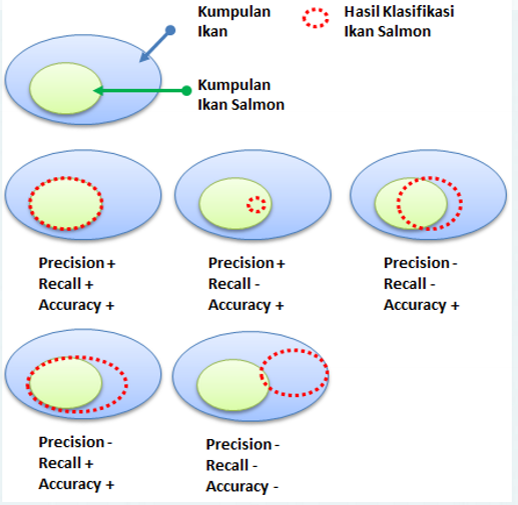

Dari ilustrasi di atas, didapatkan bahwa metriks evaluasi yang digunakan pada kasus heart disease ini ialah akurasi dan recall.

Recall dipilih karena pada kasus ini lebih baik False Positif terjadi daripada False Negatif

##5. Model Conclusion

Model yang memiliki prediksi dengan nilai recall dan akurasi yang paling baik ialah model dengan algoritma SVM.

Didapatkan nilai recall sebesar 0.83 untuk target 0 dan 0.87 untuk target 1. Akurasi total ialah 0.857. Model bisa dikatakan cukup baik.

Pada saat cross validation dilakukan, didapatkan nilai skor cross validation tertinggi sebesar 0.967. Learning curves menunjukkan underfit. Setelah hyperparameter tuning dilakukan, akurasi menurun menjadi 0.835. Boostraping juga dilakukan dan didapatkan Average Boostrapped Scores:  0.83.

Penurunan akurasi ini dikarenakan dataset yang terbilang sedikit, sehingga cukup sulit untuk menemukan parameter terbaiknya.